<a href="https://www.mulks.ac" target="_blank"><img src="fig/logo.png" alt=""></a>

<h1>Word Cloud</h1>

Import Primary Modules:

In [2]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library
from wordcloud import WordCloud, STOPWORDS
from matplotlib import pyplot as plt
from PIL import Image # converting images into arrays

`Word` clouds are commonly used to perform high-level analysis and visualization of text data. Accordinly, let's digress from the immigration dataset and work with an example that involves analyzing text data. Let's try to analyze the text of my first 10 published peer-reviewed articles. Let's go ahead and open a _.txt_ file with their combined text.

In [3]:
# open the file and read it into a variable publication_text
publication_text = open('publication_text.txt', 'r', errors='replace').read()
    
print ('File opened!')

File opened!


Next, let's use the stopwords that we imported from `word_cloud`. We use the function *set* to remove any redundant stopwords.

In [4]:
stopwords = set(STOPWORDS)

Create a word cloud object and generate a word cloud. For now, let's generate a word cloud using only the first 2000 words.

In [5]:
# instantiate a word cloud object
publication_wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
publication_wc.generate(publication_text)

Awesome! Now that the `word` cloud is created, let's visualize it.

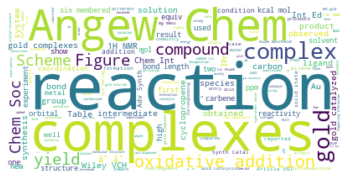

In [6]:
# display the word cloud
plt.imshow(publication_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Interesting! So in the first 2000 words in the novel, the most common words are **Reaction**, **Angew**, **Chem**, **complexes**, and so on. Let's resize the cloud so that we can see the less frequent words a little better.

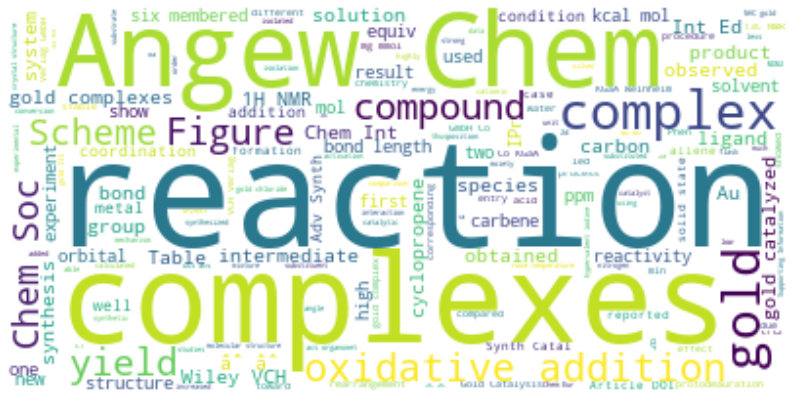

In [7]:
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

# display the cloud
plt.imshow(publication_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Much better! However, **said** isn't really an informative word. So let's add it to our stopwords and re-generate the cloud.

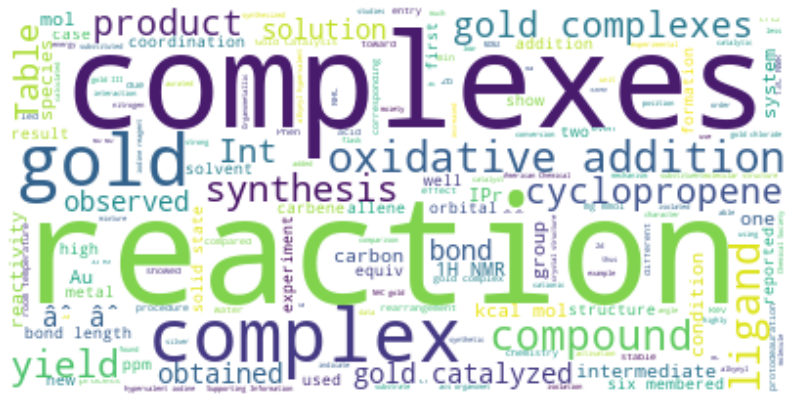

In [8]:
#stopwords = set(STOPWORDS)

# add additional stopwords
additional_stopwords = ['Angew', 'Chem', 'Figure', 'Scheme', 'Table,' 'Int', 'Ed', 'Soc', 'DOI', 'Wiley', 'VCH', "Co", 'KGaA',
                        'â^', 'Verlag', 'GmbH', 'Synth', 'Adv', 'Catal']

for additional_stopword in additional_stopwords:
    stopwords.add(additional_stopword) # add the words to stopwords

publication_wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)    

# re-generate the word cloud
publication_wc.generate(publication_text)

# display the cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(publication_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Excellent! This looks really interesting! Another cool thing you can implement with the `word_cloud` package is superimposing the words onto a mask of any shape. Let's use a mask of an Erlenmeyer flask.

In [11]:
# save mask to publication_mask
publication_mask = np.array(Image.open('fig/flask.png'))
    
print('Image opened and saved!')

Image opened and saved!


Let's take a look at how the mask looks like.

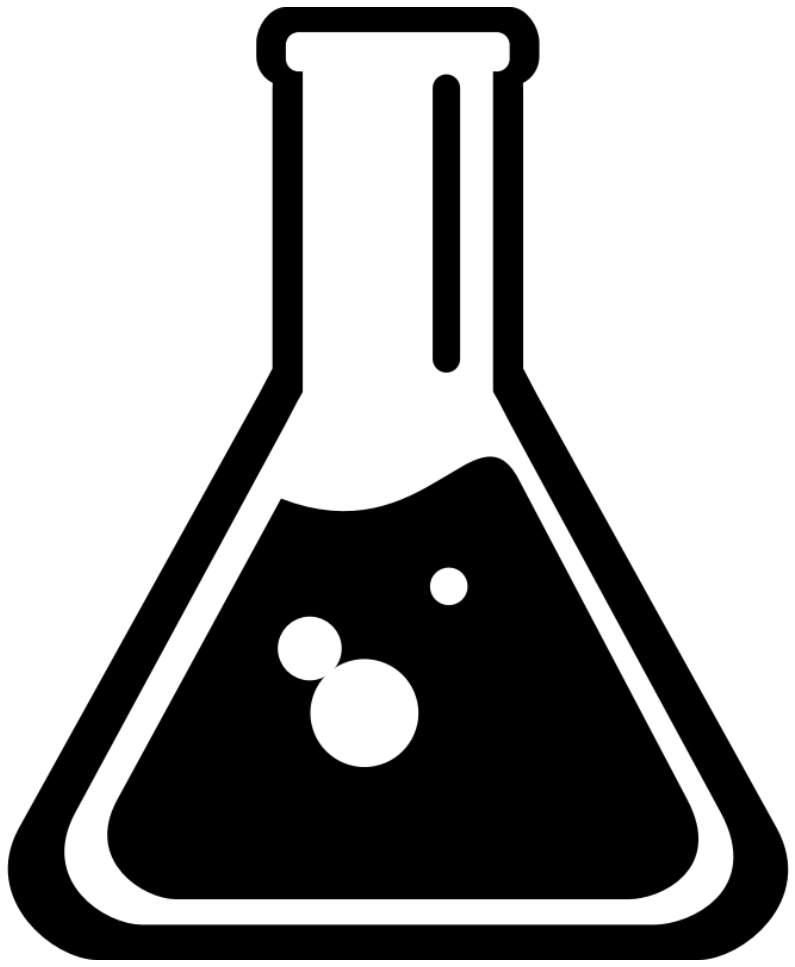

In [12]:
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(publication_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

Shaping the `word` cloud according to the mask is straightforward using `word_cloud` package. For the final image, we will now use all words.

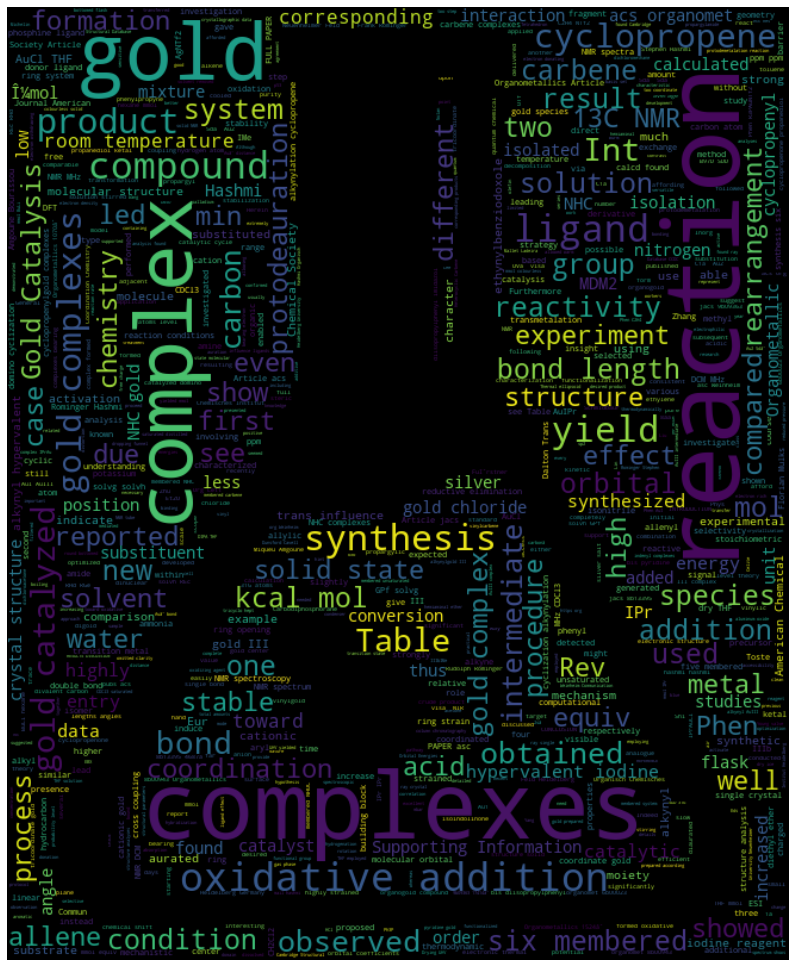

In [21]:
# instantiate a word cloud object
publication_wc = WordCloud(background_color='black', mask=publication_mask, stopwords=stopwords, max_words=2000,
                          min_word_length=3)

# generate the word cloud
publication_wc.generate(publication_text)

# display the word cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(publication_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

<hr>

Thanks to IBM and [Alex Aklson](https://www.linkedin.com/in/aklson/) for teaching this via Coursera. This notebook was created with the help of a notebook that is part of a course on **Coursera** called *Data Visualization with Python*. You can take this course online by clicking [here](http://cocl.us/DV0101EN_Coursera_Week3_LAB1). Copyright &copy; 2019 [Cognitive Class](https://cognitiveclass.ai/?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu). The course notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license/).

